<a href="https://colab.research.google.com/github/SerhiiAndreiko/HW_DATA_02/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv')
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# **Виведіть розміри датасету (використовуйте атрибут shape)**

In [8]:
df.shape

(550, 7)

In [10]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [12]:
list(df.head())

['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


Про скільки книг зберігає дані датасет?
Відповідь:351 унікальний запис

In [14]:
df_unique = df['name'].unique()
print(len(df_unique))

351


# **Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)**

In [15]:
missing_values = df.isnull().sum()
# Підрахунок частки пропущених значень в кожній колонці
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100
# Виведемо результати
print("Кількість пропусків в кожній колонці:")
# print(missing_percentage.round(2))
print(missing_values)

Кількість пропусків в кожній колонці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


 # Чи є в якихось змінних пропуски? (Так / ні)
 Відповідь: Ні

In [16]:
list(df.head())

['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# **Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)**

In [18]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

 # Які є унікальні жанри?
 Відповідь: Загалом тільки два жанри - це Fiction і Non Fiction

# **Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')**

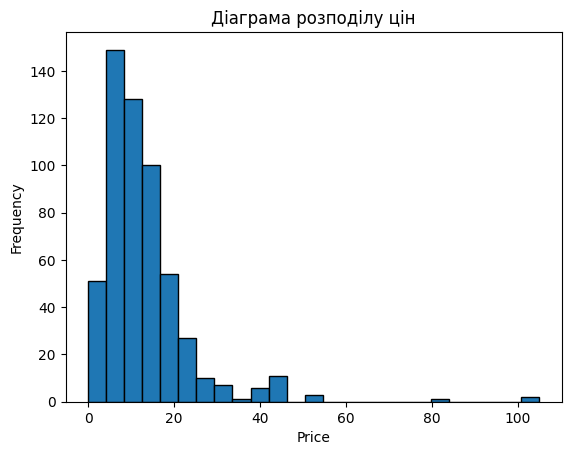

In [19]:
import matplotlib.pyplot as plt


df['price'].plot(kind='hist', bins=25, edgecolor='black')

plt.title('Діаграма розподілу цін')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

# **Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)**

In [20]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
print(f"Max price is {max_price}, Min price is {min_price}, Mean price is {mean_price}, Median price is {median_price}")



Max price is 105, Min price is 0, Mean price is 13.1, Median price is 11.0


# Максимальна ціна?
Відповідь: 105
# Мінімальна ціна?
Відповідь: 0
# Середня ціна?
Відповідь: 13.1
# Медіанна ціна?
Відповідь: 11.0

# **Пошук та сортування даних**

In [22]:
max_ratings = df.groupby('name')['user_rating'].max()
max_rating_value = max_ratings.max()
count_max_rating = (max_ratings == max_rating_value).sum()
print(f"Кількість записів з найвищим рейтингом ({max_rating_value}): {count_max_rating}")

Кількість записів з найвищим рейтингом (4.9): 28


# Який рейтинг у датасеті найвищий?
Відповідь: 4,9
# Скільки книг мають такий рейтинг?
Відповідь: 28

In [23]:
max_ratings = df.groupby('name')['reviews'].max()
max_rating_value = max_ratings.max()
count_max_rating = (max_ratings == max_rating_value).sum()
print(f"Кількість відгуків з найвищим рейтингом ({max_rating_value}): {count_max_rating}")

Кількість відгуків з найвищим рейтингом (87841): 1


In [24]:
max_reviews_index = df['reviews'].idxmax()
book_with_max_reviews = df.loc[max_reviews_index]
book_with_max_reviews["name"]

'Where the Crawdads Sing'

# Яка книга має найбільше відгуків?
Відповідь: Where the Crawdads Sing

In [25]:
top_50_books_2015 = df[df['year'] == 2015].sort_values(by='user_rating', ascending=False).head(50)
max_price = top_50_books_2015["price"].idxmax()
book = top_50_books_2015.loc[max_price]
book["name"]

'Publication Manual of the American Psychological Association, 6th Edition'

# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
Відповідь: Publication Manual of the American Psychological Association, 6th Edition

In [26]:
top_50_books_2010 = df[df['year'] == 2010].sort_values(by='user_rating', ascending=False).head(50)
fiction_books = top_50_books_2010[top_50_books_2010['genre'] == 'Fiction']
print(len(fiction_books))

20


# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
Відповідь: 20

In [27]:
filter = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
filter


,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
Відповідь:Одна: Jesus Calling: Enjoying Peace in His Presence

In [28]:
less_then_8 = top_50_books_2015[top_50_books_2015["price"] < 8]
sorted = less_then_8.sort_values(by='price', ascending=True)
sorted

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction


# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

#  Яка книга остання у відсортованому списку? Відповідь:
Відповідь: Old School (Diary of a Wimpy Kid #10)

# **Агрегування даних та з'єднання таблиць**

# **Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам**

In [29]:
agg_func_math = {
    'price': ['min', 'max'],

}
result = df.groupby(['genre']).agg(agg_func_math)
print(result)

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


# Максимальна ціна для жанру Fiction;
Відповідь: 82

# Мінімальна ціна для жанру Fiction;
Відповідь: 0

# Максимальна ціна для жанру Non Fiction;
Відповідь: 105

# Мінімальна ціна для жанру Non Fiction;
Відповідь: 0

# **Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні**

In [30]:
df_new = df.copy()
columns_to_keep = ['name', 'author']
df_new = df_new[columns_to_keep]
df_new.columns.tolist()

['name', 'author']

In [31]:
df_quantity = df_new.groupby('author').size().reset_index(name='кількість книг')

df_quantity.sort_values('кількість книг')


,author,кількість книг
123,Jill Twiss,1
178,Patrick Thorpe,1
109,Ian K. Smith M.D.,1
108,Howard Stern,1
107,Hopscotch Girls,1
...,...,...
11,American Psychological Association,10
226,Suzanne Collins,11
92,Gary Chapman,11
197,Rick Riordan,11


# Якої розмірності вийшла таблиця?
Відповідь: 248x2

# Який автор має найбільше книг?
Відповідь: Jeff Kinney

# Скільки книг цього автора?
Відповідь: 12

# **Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні**

In [34]:
df_new_rating = df.copy()
columns_to_keep = ['author','user_rating']
df_new_rating = df_new_rating[columns_to_keep]
df_new_rating.columns.tolist()


['author', 'user_rating']

In [35]:
df_avr = df_new_rating.groupby('author')['user_rating'].mean()

df_avr.sort_values()

author
Donna Tartt           3.9
Gillian Flynn         4.0
Muriel Barbery        4.0
Gallup                4.0
Ian K. Smith M.D.     4.1
                     ... 
Lin-Manuel Miranda    4.9
Patrick Thorpe        4.9
Nathan W. Pyle        4.9
Bill Martin Jr.       4.9
Jill Twiss            4.9
Name: user_rating, Length: 248, dtype: float64

In [38]:

average_rating_by_author = df_new_rating.groupby('author')['user_rating'].mean()
result_avg =average_rating_by_author.sort_values()
result_avg = result_avg.reset_index()
result_avg.columns = ['author', 'середній рейтинг']
print(result_avg)

                 author  середній рейтинг
0           Donna Tartt               3.9
1         Gillian Flynn               4.0
2        Muriel Barbery               4.0
3                Gallup               4.0
4     Ian K. Smith M.D.               4.1
..                  ...               ...
243  Lin-Manuel Miranda               4.9
244      Patrick Thorpe               4.9
245      Nathan W. Pyle               4.9
246     Bill Martin Jr.               4.9
247          Jill Twiss               4.9

[248 rows x 2 columns]


# У якого автора середній рейтинг мінімальний?
Відповідь: Donna Tartt

# Який у цього автора середній рейтинг?
Відповідь:3.9

In [41]:
result_avg.round(2)

,author,середній рейтинг
0,Donna Tartt,3.9
1,Gillian Flynn,4.0
2,Muriel Barbery,4.0
3,Gallup,4.0
4,Ian K. Smith M.D.,4.1
...,...,...
243,Lin-Manuel Miranda,4.9
244,Patrick Thorpe,4.9
245,Nathan W. Pyle,4.9
246,Bill Martin Jr.,4.9


In [ ]:
result_concat = pd.concat([df_quantity.set_index('author'), result_avg.set_index('author')], axis=1)


result_concat.round(2)

,кількість книг,середній рейтинг
author,,
Abraham Verghese,2,4.60
Adam Gasiewski,1,4.40
Adam Mansbach,1,4.80
Adir Levy,1,4.80
Admiral William H. McRaven,1,4.70
...,...,...
Walter Isaacson,3,4.57
William Davis,2,4.40
William P. Young,2,4.60


In [43]:
result_concat.sort_values('середній рейтинг')

,кількість книг,середній рейтинг
author,,
Donna Tartt,2,3.9
Gillian Flynn,3,4.0
Muriel Barbery,1,4.0
Gallup,9,4.0
Ian K. Smith M.D.,1,4.1
...,...,...
Lin-Manuel Miranda,1,4.9
Patrick Thorpe,1,4.9
Nathan W. Pyle,1,4.9


# **З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну**



In [44]:
result_summ=result_concat.sort_values('кількість книг')
print(result_summ.round(2))


                                    кількість книг  середній рейтинг
author                                                              
Jill Twiss                                       1              4.90
Patrick Thorpe                                   1              4.90
Ian K. Smith M.D.                                1              4.10
Howard Stern                                     1              4.30
Hopscotch Girls                                  1              4.80
...                                            ...               ...
American Psychological Association              10              4.50
Suzanne Collins                                 11              4.66
Gary Chapman                                    11              4.74
Rick Riordan                                    11              4.77
Jeff Kinney                                     12              4.80

[248 rows x 2 columns]


# **Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)**

In [45]:
result_concat = result_concat.sort_values(by=['кількість книг', 'середній рейтинг'], ascending=[True, True])
print(result_concat.round(2))

                                    кількість книг  середній рейтинг
author                                                              
Muriel Barbery                                   1              4.00
Chris Cleave                                     1              4.10
Ian K. Smith M.D.                                1              4.10
Pierre Dukan                                     1              4.10
Elizabeth Strout                                 1              4.20
...                                            ...               ...
American Psychological Association              10              4.50
Suzanne Collins                                 11              4.66
Gary Chapman                                    11              4.74
Rick Riordan                                    11              4.77
Jeff Kinney                                     12              4.80

[248 rows x 2 columns]


# Який автор перший у списку?
Відповідь: Muriel Barbery 4.00

# **Візуалізація данних**

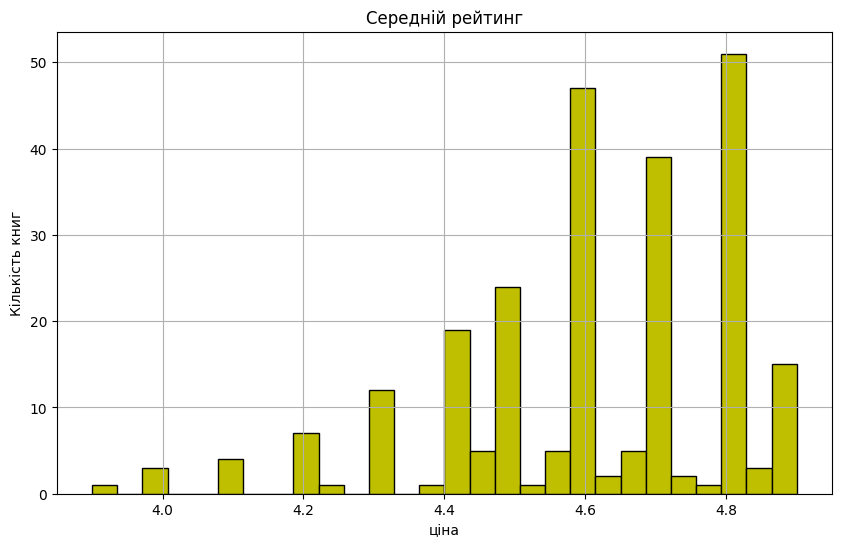

In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.figure(figsize=(10, 6))
result_concat['середній рейтинг'].plot(kind='hist', bins=28, alpha=1, color='y', edgecolor='black')
plt.title('Середній рейтинг')
plt.xlabel('ціна')
plt.ylabel('Кількість книг')
plt.grid(True)
plt.show()
